@[toc](numpy的学习)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import statsmodels as sm 

# 4.1 notebook的使用

In [ ]:
# tab代码补全
#  帮助功能？
a = [1,2,3]

def  add_sum(list,sum=0):
    '''求和函数'''
    for num in list:
        sum+=num
    return sum
# add_sum?  显示函数注释
# add_sum??    显示源码
# %run clip.pyw 运行模块
# %load clip.bat 打开脚本
# ctrl-C中断运行

# 4.2 numpy基础知识

In [ ]:
# numpy数组和python数组的区别
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [ ]:
# numpy 运行时间短
for _ in range(100):
    my_arr2 = my_arr*2

In [ ]:
for _ in range(100):
    mylist2 = [x*2 for x in my_list]

In [ ]:
# numpy的基本计算和标量相同
data = np.random.randn(2,3)
# 直接生成数组
print(data)
print(data*10)
print(data+data)
print(data.shape)
print(data.dtype)
# arange是range的数组版本
np.arange(15)

In [ ]:
# numpy数组即 ndarray数组的创建：array函数
# 一维序列对应一维数组，多维序列对应多维数组
series1 = [1,2,3,5,6,7]
arr1 = np.array(series1)
print(arr1)
series2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(series2)  # 同结构转换成多维数组，不同结构是list的一维数组
print(arr2)
print(arr2.ndim) # 根据series数据演化
print(arr2.shape)
print(arr2.dtype)

In [ ]:
# zeros ones empty函数创建多维数组 传入元组作为参数即可
# eye单位阵 full填充
arr3 = np.zeros(10)
arr4 = np.zeros((2,3)) # zeros_like以另一个数组为参照复制0
arr5 = np.ones((3,5))   # ones_like以另一个数组为参照复制1
arr6 = np.empty((2,3,3))  # 第一个参数是矩阵个数，通常是看不到的一面
print(arr3)
print(arr4)
print(arr5)
print(arr6)

In [ ]:
# 转换数组元素的类型
# 整数和浮点数互换
arr = np.array([1,2,3,4,5])
print(arr.dtype)
arr1 = arr.astype(np.float64)
print(arr1.dtype)
arr2 = arr1.astype(np.int32)
print(arr2.dtype)
# 数字字符串转换为数字
# arr = np.array(['1','2','3','4','ren'])
# ValueError: could not convert string to float: 'ren'
arr = np.array(['1','2','3','4','5'])
print(arr.dtype)
print(arr.astype('float64').dtype)
print(arr)
print(arr.astype('float64'))
# 不仅可以指定数据类型，还可以使用别的数据类型
arr1 = np.arange(10)
print(arr1.dtype)
arr2 = np.array([1.0,2.0,3.0,4.0,5.0])
print(arr2.dtype)
arr3 = arr1.astype(arr2.dtype)
print(arr3.dtype)
arr4 = arr3.astype('u4')
print(arr4)

In [ ]:
# numpy 数组的运算:作用在元素上
arr = np.array([[1,2,3],[4,5,6]])
print(arr)
arr1 = 1/arr
print(arr1)
arr2 = arr*arr
print(arr2)
arrsqrt = arr**0.5
print(arrsqrt)
arr2> arr

# 4.3 numpy的索引和切片

In [ ]:
# 数组的索引和切片
# 一维数组
arr = np.arange(10)
print(arr)
arr[4]
arr[5:8]
arr[5:8] = 12 # 对切片赋值标量，会扩散到其他选取
print(arr)
slice_arr = arr[5:8]
slice_arr[1] = 10
print(arr)   # 即使对新的变量操作也会反映在原始数组上，不会复制数组数据占用新的内存
slice_arr[:] = 10
print(arr) # : 针对所有值
slice_arr = arr[5:8].copy()
slice_arr[:] = 111
print(arr) # copy副本后原数组没有发生变化
# 二维数组索引: axis = 0 是行 axis=1 是列
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr)
print(arr[0,1])
# 三维度数组的赋值和索引
arr3d  = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(arr3d)
print(arr3d[0])
print(arr3d[1])
# 可以标量赋值也可以数组赋值
slice_arr3d = arr3d[0].copy()
arr3d[0] = 23
print(arr3d)
arr3d[0] = slice_arr3d
print(arr3d)
# 索引
print(arr3d[0,1,2])

In [ ]:
# 切片
# 二维数组
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2d[:2]) # 默认按行索引
print(arr2d[:2,1:]) # 前两行，后两列，从0开始，：2 类似range(1:2) 2不会进行索引
print(arr2d[1,:2])
print(arr2d[:,:2]) # :表示选取整个轴
arr2d[:2, 1:] = 0
print(arr2d)

In [ ]:
# 布尔值索引
names = np.array(['zhao','qian','sun','li','fen','chen','chu','wei'])
# 对应 0 1 2 3 4 5 6 7  原本是对对对对对对对对
# 根据布尔值判断索引哪个
data = np.random.randn(8,4)
print(names)
print(data)
names == 'sun'
print('\n')
print(data[names=='sun'])
print(data[names=='sun',:2])
print(data[names!='sun',:2])
print('\n')
cond = names=='sun'
print(data[~cond,:2])
print(data[(names=='sun')|(names=='zhao'),:2])
# 布尔值赋值
data[data<0] = 0
print(data)
data[names!='sun'] = 100
print(data)

In [ ]:
# 花式索引
# 利用数组来进行索引
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
print(arr[[2,3,1,5]])
print(arr[[-1,-2,-3]]) # 从末尾开始
print(arr[[1,2,3,4],[0,1,2,3]]) # 返回1,0  2,1 3,2 4,3 一个元组 
print(arr[[1,2,3,4]][:,[0,1,2,3]]) # 只能传入一个数组索引，然后对其进行数组操作得到矩阵块

# 4.4 numpy的基本运算
- 转置：.T transpose() swapaxes()
- 元素级别的运算：根号、指数、maximum

In [ ]:
# 数组转置和轴的对换
arr = np.arange(15).reshape((3,5))
print(arr)
print(arr.T)
# 矩阵内积即矩阵乘法
print(np.dot(arr.T,arr))
# 对于高维数组，需要一个由轴编号组成的元组才能对这些轴进行转置
arr = np.arange(16).reshape((2,2,4))
print(arr)
print(arr.transpose((1,0,2)))   # 正常（0，1，2）
# 转置第一个轴和第二个轴，第三个轴不变，三维图形上对侧面矩阵进行转置
# [0][1]与[1][0]互换位置
# swapaxes方法 也是对轴进行转置 
print(arr.swapaxes(1,2))

In [ ]:
# 元素级别的数组函数
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x,y)
# modf是divmod的矢量化版本，返回浮点数的整数和小数部分
arr = np.random.randn(7)*5
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

# 4.5 numpy的数据处理
- 随机数组的生成
- 可视化
- 条件逻辑对数组进行处理
- 描述性统计
- 排序
- 集合、唯一化
- 存储和加载

In [ ]:
points = np.arange(-5,5,0.01)     # -5,5 以0.01为间隔
xs,ys = np.meshgrid(points,points) # 接受两个一维数组，产生两个二维数组
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

In [ ]:
# 可视化
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2}$ for a grid of values')

In [ ]:
# 条件逻辑表述为数组运算
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True,False,True,True,False])
# 列表推导式
result = [(x if c else y)
                for x,y,c in zip(xarr,yarr,cond)]
print(result)
# numpy函数
result = np.where(cond,xarr,yarr) # 第一个参数是条件
print(result) 
# np.where 也可以将数组中的元素按条件替换
arr = np.random.randn(3,4)
print(arr>0)
result = np.where(arr>0,2,-2)  # 类似excel的if函数，是一种取值函数
print(result)
result = np.where(arr>0,2,arr) # 满足条件取2，不满足条件取arr中的值
print(result)

In [ ]:
# 统计方法
# 既可以当作arr对象的一个方法也可以用np.mean这样的函数
arr = np.random.randn(5,4)
print(arr)
print(arr.mean())
print(np.mean(arr))
# 这类函数可以接受一个axis参数做聚类
print(arr.mean(axis=1)) # 列运算，沿轴方向运算
print(arr.mean(axis=0)) # 行运算
print(arr.sum(1))
# 累加函数，不聚合，产生一个包含中间结果的数组
arr = np.array([0,1,2,3,4,5,6,7,8,9])
print(arr.cumsum())
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))


In [ ]:
# 布尔型数组
# 统计满足条件的元素个数
arr  = np.random.randn(100)
print((arr>0).sum())
# any 至少一个满足条件
# all 所有都满足条件
bools = np.array([False,False,True,False])
print(bools.any())
print(bools.all())

In [ ]:
# 排序
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)
arr = np.random.randn(3,4)
print(arr)
arr.sort(1)
print(arr)
# 分位数求法
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))]  # 5%分位数

In [ ]:
# 集合-唯一化
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
print(np.unique(names)) # numpy
print(sorted(set(names))) # python
# 检验数组中的元素是否在另一个数组中
values = np.array([1,2,3,4,5,6,7,2])
print(np.in1d(values,[2,3,6])) # x的元素是否包含于y
print(np.intersect1d(values,[2,3,5])) # 交集
print(np.union1d(values,[2,3,5,8])) # 并集
print(np.setdiff1d(values,[2,3,5,8]))   # 差的集合
print(np.setxor1d(values,[2,3,9,0]))  # 对称差，去掉交集部分

In [ ]:
# 数组的保存和加载
arr = np.random.randn(3,4)
np.save('some_array',arr)
arr_load = np.load('some_array.npy')
print(arr_load)

In [ ]:
# 多个数组的保存和加载，以关键字存储
np.savez('arr_group.npz',a=arr,b=arr_load)
group = np.load('arr_group.npz')
print(group['a'])  # 类似字典
# 如果要对数据进行压缩，可以使用savez_compressed函数

# 4.6 numpy线性代数
 - 矩阵乘法
 - 矩阵分解QR SVD
 - 逆、行列式、特征值
 - 方程组

In [ ]:
#  矩阵乘法
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[2,3,4],[5,6,7],[6,7,8]])
print(np.dot(x,y))
print(x.dot(y))

In [ ]:
# 矩阵分解、逆、行列式、方程组求解等
from numpy.linalg import inv,qr,det

X = np.random.randn(4,4)
mat = X.T.dot(X)   # (X'X)
A = inv(mat)  #(X'X)-1
Q = A.dot(mat) 
P = A.dot(X.T)
print(P)
print(Q)
# qr分解
q,r= qr(mat)
print(q)
print(r)
print(mat.trace())
print(np.linalg.det(mat))

# 4.7 伪随机数的生成
- numpy适合生成大量样本

In [ ]:
data = np.random.normal(size=(4,4))
print(data)

In [ ]:
# python生成10000个样本
from random import normalvariate
N=1000000
samples = [normalvariate(0,1) for _ in range(N)]

In [ ]:
# np生成100000个样本
samples = np.random.normal(size=N)

In [ ]:
# 伪随机数：根据随机数种子生成
# 可以更改种子
np.random.seed(1234)
arr = np.random.randn(10)
print(arr)
np.random.seed(1233)
arr = np.random.randn(10)
print(arr)

# 4.7 随机漫步实例

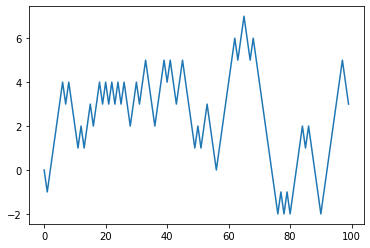

In [70]:
# 纯python语法
import random 

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1   # 0,1之间的整数只有0和1，其中0为false
    position += step
    walk.append(position)
plt.plot(walk[:100])

[-1  0  1  2  3  4  5  4  5  6  7  8  7  6  7  6  5  4  5  4  5  6  5  6
  5  4  3  4  3  4  3  4  5  6  5  6  5  6  7  6  5  6  5  4  3  4  3  4
  3  2  1  2  3  4  5  6  5  6  5  4  5  4  3  2  3  2  3  4  3  4  3  2
  1  2  3  2  3  4  5  6  5  6  5  6  7  8  7  6  7  8  7  8  9 10 11 10
 11 12 11 12]
-1 47
93


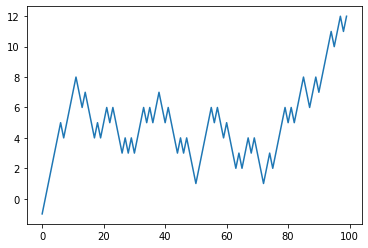

In [76]:
# numpy计算累计和
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps) #0-1的整数
# print(draws)
steps = np.where(draws>0,1,-1)
walk = steps.cumsum()
print(walk[:100])
plt.plot(walk[:100])
# 计算最大值和最小值
minwalk = walk.min()
maxwalk = walk.max()
print(minwalk,maxwalk)
# 计算首达时间：第一次走10步的索引
t = (np.abs(walk)>=10).argmax()
print(t)

In [81]:
# 模拟多个随机游走
nwalks = 5000
nsteps = 1000
steps = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(steps>0,1,-1)
walk = np.cumsum(steps,axis=1)
print(walk[:100])
min_walk = walk.min()
max_walk = walk.max()
print(min_walk,max_walk)
# 首达时间，对所有行进行检查？不，用any函数
hits30 = (np.abs(walk)>=30).any(1) # 检查哪一行到达了30
print(hits30)
hist30.sum()
# 计算首达时间
crossing_times = (np.abs(walk[hits30])>=30).argmax(1)  #选取达到30的行数计算首达时间
print(crossing_times)
print(crossing_times.mean())  # 平均首达时间


[[  1   0   1 ...  22  23  24]
 [ -1  -2  -3 ...  12  11  12]
 [  1   2   1 ... -32 -33 -34]
 ...
 [ -1  -2  -3 ... -32 -33 -32]
 [  1   2   3 ...  14  13  12]
 [  1   0   1 ...  -2  -3  -2]]
-114 147
[ True False  True ...  True  True False]
[231 397 571 ... 777 897 171]
498.44862303819957
